In [2]:
# set path
rootdir = '/Users/rj/'
import os,sys
# append the path where your scripts are
sys.path.append(rootdir+"soft/python/") 
# import your own packages
from universal import *
plot_conf()

workdir = rootdir + 'Fellow-CERN/ATF2/ExpData/dfknob/May/'
os.chdir(workdir)
import random as rand

# from matplotlib.ticker import AutoMinorLocator

In [3]:
dat0 = loadtxt('./data/df_20190521.txt',skiprows=1)
df, dp, nux, nuy = transpose(dat0)

dat0 = loadtxt('./data/df_20190528.txt',skiprows=1)
df2, dp2, nux2, nuy2 = transpose(dat0)

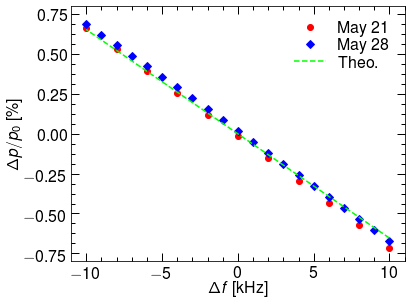

In [9]:
alphac = 2.14e-3
f0 = 714e6 # MHz
dp_id = -df*1e3/alphac/f0

fig = plt.figure()
plt.plot(df, dp*1e2, 'o', label='May 21')
plt.plot(df2, dp2*1e2, 'D', label='May 28')
plt.plot(df, dp_id*1e2, '--', label='Theo.')
plt.xlabel(r'$\Delta{f}$ [kHz]')
plt.ylabel(r'$\Delta{p}/p_0$ [\%]')
plt.ylim(-0.8, 0.8)
plt.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/dp_df_20190521.pdf')
fig.savefig('./figure/dp_df_20190521.eps')

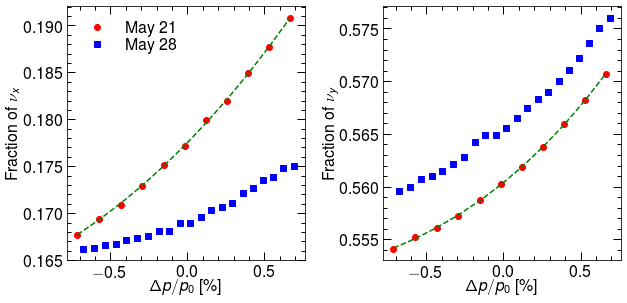

In [26]:
# tune vs. df
rx = np.polyfit(dp, nux, 3)
ry = np.polyfit(dp, nuy, 3)
f_x = np.poly1d(rx)
f_y = np.poly1d(ry)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dp*1e2, nux, 'o', label='May 21')
ax1.plot(dp2*1e2, nux2, 's', label='May 28')
ax1.plot(dp*1e2, f_x(dp), 'g--')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'Fraction of $\nu_x$')
ax1.legend(loc='best', frameon=False)

ax2.plot(dp*1e2, nuy, 'o', label='May 21')
ax2.plot(dp2*1e2, nuy2, 's', label='May 28')
ax2.plot(dp*1e2, f_y(dp), 'g--')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r'Fraction of $\nu_y$')

fig.tight_layout()
plt.show()
fig.savefig('./figure/tune_df_20190521.pdf')
fig.savefig('./figure/tune_df_20190521.eps')

In [19]:
# data May 21, 2019
# dp = -df/alpha/f0
dp_iex = -np.array([10, 5, 0, -5, -10])*1e3/alphac/f0
bx_iex = np.array([4.3614, 4.77552, 5.14628, 5.64608, 6.04627])
by_iex = np.array([2.15286, 2.31337, 2.49096, 2.58962, 2.70177])
ax_iex = np.array([0.24967, 0.25679, 0.27249, 0.33843, 0.39786])
ay_iex = np.array([-1.2117, -1.3357, -1.4773, -1.6312, -1.7907])

In [20]:
# data May 28, 2019
dp_iex2 = -np.array([-9, -6, -3, 0, 3, 6, 9])*1e3/alphac/f0
bx_iex2 = np.array([5.850, 5.424, 5.177, 5.100, 4.728, 4.500, 4.332])
by_iex2 = np.array([2.865, 2.599, 2.512, 2.461, 2.390, 2.368, 2.231])
ax_iex2 = np.array([0.435, 0.390, 0.428, 0.330, 0.366, 0.374, 0.340])
ay_iex2 = np.array([-1.897, -1.693, -1.568, -1.529, -1.266, -1.31, -1.229])

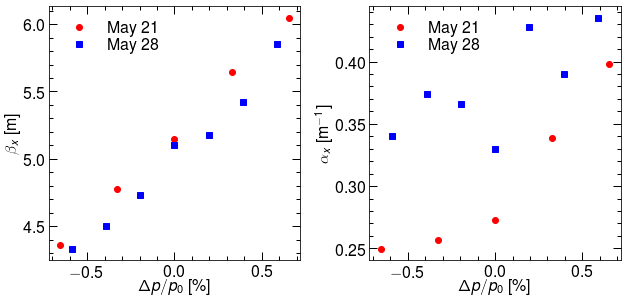

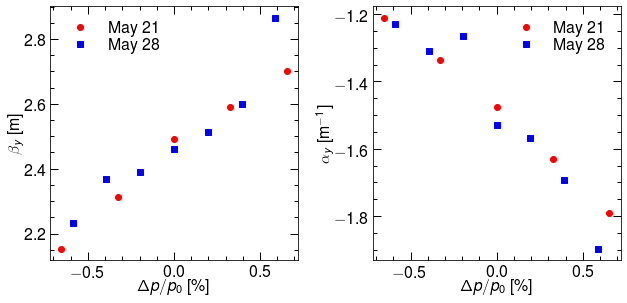

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dp_iex*1e2, bx_iex, 'o',label='May 21')
ax1.plot(dp_iex2*1e2, bx_iex2, 's',label='May 28')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$\beta_x$ [m]')
ax1.legend(loc='best', frameon=False)

ax2.plot(dp_iex*1e2, ax_iex, 'o', label='May 21')
ax2.plot(dp_iex2*1e2, ax_iex2, 's', label='May 28')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r'$\alpha_x$ [m$^{-1}$]')
ax2.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/twiss_iex_hor_20190521.pdf')
fig.savefig('./figure/twiss_iex_hor_20190521.png', dpi=300)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dp_iex*1e2, by_iex, 'o',label='May 21')
ax1.plot(dp_iex2*1e2, by_iex2, 's',label='May 28')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$\beta_y$ [m]')
ax1.legend(loc='best', frameon=False)

ax2.plot(dp_iex*1e2, ay_iex, 'o', label='May 21')
ax2.plot(dp_iex2*1e2, ay_iex2, 's', label='May 28')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r'$\alpha_y$ [m$^{-1}$]')
ax2.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/twiss_iex_ver_20190521.pdf')
fig.savefig('./figure/twiss_iex_ver_20190521.png', dpi=300)

In [142]:
# beta function of ring
# 0 kHz
dat0 = loadtxt('./data/ringbeta/beta_0kHz_20190521.dat', usecols=[0,2,3])
s0, bx0, by0 = transpose(dat0)
# +5 kHz
dat0 = loadtxt('./data/ringbeta/beta_+5kHz_20190521.dat', usecols=[0,2,3])
s1, bx1, by1 = transpose(dat0)
# -5 kHz
dat0 = loadtxt('./data/ringbeta/beta_-5kHz_20190521.dat', usecols=[0,2,3])
s2, bx2, by2 = transpose(dat0)

# 
dat0 = np.loadtxt('./data/ringbeta/DR_twiss_orbit.dat')
pos, betx, bety, ex, ey, dx, dy = transpose(dat0)

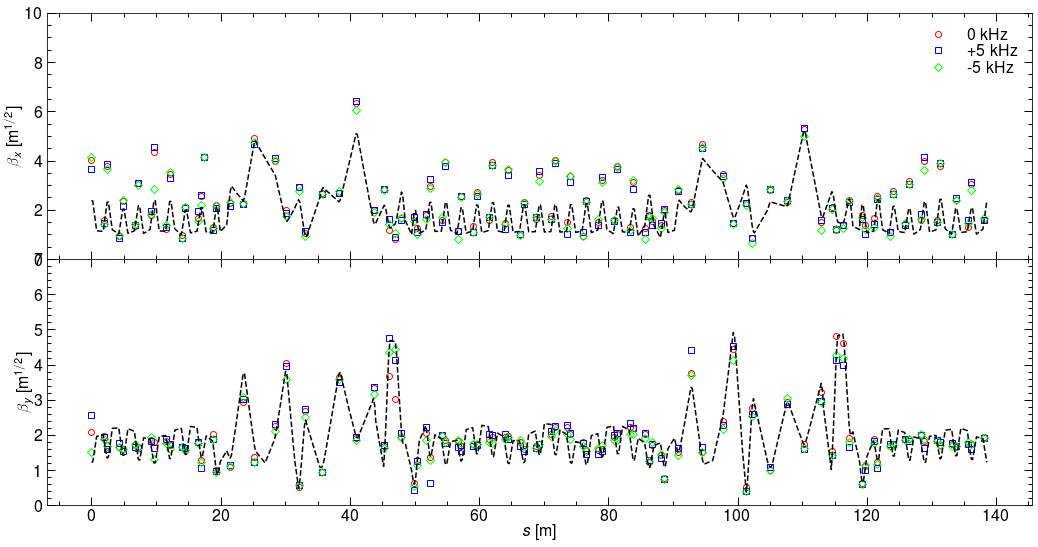

In [150]:
fig, axs = plt.subplots(2, 1, sharex = True, figsize=(18,9))
fig.subplots_adjust(hspace=0)
axs[0].plot(s0, sqrt(bx0), 'o', mfc='none', label=r' 0 kHz')
axs[0].plot(s1, sqrt(bx1), 's', mfc='none', label=r'+5 kHz')
axs[0].plot(s2, sqrt(bx2), 'D', mfc='none', label=r'-5 kHz')
axs[0].plot(pos, sqrt(betx), '--', mfc='none')
axs[0].set_ylim(0, 10)
axs[0].set_ylabel(r'$\beta_x$ [m$^{1/2}$]')
axs[0].legend(loc='best', frameon=False)

axs[1].plot(s0, sqrt(by0), 'o', mfc='none', label=r' 0 kHz')
axs[1].plot(s1, sqrt(by1), 's', mfc='none',label=r'+5 kHz')
axs[1].plot(s2, sqrt(by2), 'D', mfc='none',label=r'-5 kHz')
axs[1].plot(pos, sqrt(bety), '--', mfc='none')
axs[1].set_ylim(0, 7)
axs[1].set_xlabel(r'$s$ [m]')
axs[1].set_ylabel(r'$\beta_y$ [m$^{1/2}$]')
# axs[1].legend(loc='best', frameon=False)

plt.show()
fig.savefig('./figure/check_beta_ring.pdf', bbox_inches='tight')

In [96]:
dat0 = loadtxt('./data/tune_20190521.dat')
nx, ny, np, dp = transpose(dat0)

In [135]:
t0 = range(200)
fig, axs = plt.subplots(3, 1, sharex = True)
fig.subplots_adjust(hspace=0)
axs[0].plot(t0, nx, 'r-', mfc='none')
axs[0].set_ylabel(r'$\nu_x$')
axs[0].set_ylim(0.18, 0.22)

axs[1].plot(t0, ny, 'b', mfc='none')
axs[1].set_ylabel(r'$\nu_y$')
axs[1].set_ylim(0.56, 0.57)

axs[2].plot(t0, np, 'c-', mfc='none')
axs[2].set_xlabel(r'$s$ [m]')
axs[2].set_ylabel(r'$N_e$ [$10^{10}$]')
# axs[1].legend(loc='best', frameon=False)

fig.tight_layout(pad=0.1)
plt.show()